#### Figure S16 A,B in M&S (2020) AS&T
These plots illustrate how sieving may influence the PSD of a recovered sample. This is for a case of ASHRAE #2 test dust only when sieving could collect pre-sieve dust (For ISO tests, nothing much could be captured by the sieve during the experiments due to no particle > 1000 micron).

Plot type: Line plot

In [1]:
from matplotlib import pyplot as plt
from matplotlib import container
import pandas as pd
import numpy as np

df = pd.read_excel(r'artl_v_psd_master.xlsx')

col_list_all = list(df.columns)
sieve_list = list(set([col[5:8] for col in col_list_all if ('_sd' in col)]))

col_list_sd_min = [col for col in col_list_all if ('_sd' in col) & ('_min' in col) & (col[5:8] in sieve_list)]
col_list_sd_max = [col for col in col_list_all if ('_sd' in col) & ('_max' in col) & (col[5:8] in sieve_list)]
col_list_sd_mean = [col for col in col_list_all if ('_sd' in col) & ('_mean' in col) & (col[5:8] in sieve_list)]

df_sd_min = df[col_list_sd_mean].mean(axis = 1) - df[col_list_sd_min].min(axis = 1)
df_sd_mean = df[col_list_sd_mean].mean(axis = 1)
df_sd_max = df[col_list_sd_max].max(axis = 1) - df[col_list_sd_mean].mean(axis = 1)


col_list_hd_min = [col for col in col_list_all if ('_hd' in col) & ('_min' in col) & (col[5:8] in sieve_list)]
col_list_hd_max = [col for col in col_list_all if ('_hd' in col) & ('_max' in col) & (col[5:8] in sieve_list)]
col_list_hd_mean = [col for col in col_list_all if ('_hd' in col) & ('_mean' in col) & (col[5:8] in sieve_list)]

df_hd_min = df[col_list_hd_mean].mean(axis = 1) - df[col_list_hd_min].min(axis = 1)
test = df[col_list_hd_mean]
df_hd_mean = df[col_list_hd_mean].mean(axis = 1)
df_hd_max = df[col_list_hd_max].max(axis = 1) - df[col_list_hd_mean].mean(axis = 1)


col_list_td_min = [col for col in col_list_all if ('_td' in col) & ('_min' in col) & ('ash' in col)]
col_list_td_max = [col for col in col_list_all if ('_td' in col) & ('_max' in col) & ('ash' in col)]
col_list_td_mean = [col for col in col_list_all if ('_td' in col) & ('_mean' in col) & ('ash' in col)]

df_td_min = df[col_list_td_mean].mean(axis = 1) - df[col_list_td_min].min(axis = 1) 
df_td_mean = df[col_list_td_mean].mean(axis = 1)
df_td_max = df[col_list_td_max].max(axis = 1) - df[col_list_td_mean].mean(axis = 1)


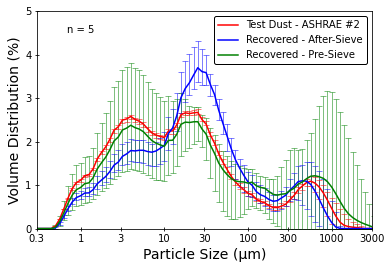

In [2]:
###################
### Figure S16A ###
###################

plt.figure()
plt.errorbar(df['Size'], df_td_mean,
             yerr = [df_td_min, df_td_max],
             xerr = None,
             capsize = 3, c = "r", ecolor = 'r', elinewidth = 0.5, capthick = 0.5,
             label = 'Test Dust - ASHRAE #2')
 
plt.errorbar(df['Size'], df_hd_mean,
             yerr = [df_hd_min, df_hd_max],
             xerr = None,
             capsize = 3, c = "b", ecolor = 'b', elinewidth = 0.5, capthick = 0.5,
             label = 'Recovered - After-Sieve')

plt.errorbar(df['Size'], df_sd_mean,
             yerr = [df_sd_min, df_sd_max],
             xerr = None,
             capsize = 3, c = "g", ecolor = 'g', elinewidth = 0.5, capthick = 0.5,
             label = 'Recovered - Pre-Sieve')


plt.xscale('log')

plt.xlim(0.3, 3000)
a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 5)
plt.yticks(np.arange(0, 6, step=1))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()

new_handles = []

for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(1, 4.5, 'n = 5', ha = 'center')

plt.savefig(r'FigureS16a.jpg', format='jpg', dpi=1600, bbox_inches='tight')


In [5]:
### Preparing data for test dust, after-sieve dust, pre-sieve dust, and combined dust to plot

comb_list = [col for col in df.columns 
             if ('_021' in col) & (('_min' in col)|('_max' in col)|('_mean' in col)) & ('_fg' not in col)] + [col for col in df.columns 
                                                                                                              if ('_td' in col) & ('ash' in col) & (('_min' in col)|('_max' in col)|('_mean' in col))]
                                                                                                              
dfc = df[comb_list]

dfc.iloc[:,3] = dfc.iloc[:,0] - dfc.iloc[:,3] # After-sieve
dfc.iloc[:,4] = dfc.iloc[:,1] - dfc.iloc[:,4] # Combined
dfc.iloc[:,5] = dfc.iloc[:,2] - dfc.iloc[:,5] # Pre-sieve


dfc.iloc[:,6] = dfc.iloc[:,6] - dfc.iloc[:,0] # After-sieve
dfc.iloc[:,7] = dfc.iloc[:,7] - dfc.iloc[:,1] # Combined
dfc.iloc[:,8] = dfc.iloc[:,8] - dfc.iloc[:,2] # Pre-sieve

## test dust
dfc.iloc[:,10] = dfc.iloc[:,9] - dfc.iloc[:,10]
dfc.iloc[:,11] = dfc.iloc[:,11] - dfc.iloc[:,9]

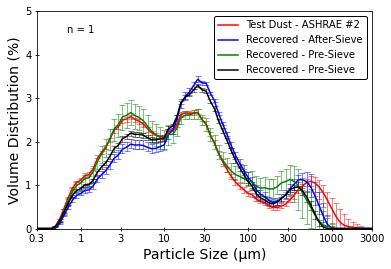

In [7]:
###################
### Figure S16B ###
###################

plt.figure()
## test dust
plt.errorbar(df['Size'], dfc.iloc[:,9],
             yerr = [dfc.iloc[:,10], dfc.iloc[:,11]],
             xerr = None,
             capsize = 3, c = "r", ecolor = 'r', elinewidth = 0.5, capthick = 0.5,
             label = 'Test Dust - ASHRAE #2')

## After-sieve
plt.errorbar(df['Size'], dfc.iloc[:,0],
             yerr = [dfc.iloc[:,3], dfc.iloc[:,6]],
             xerr = None,
             capsize = 3, c = "b", ecolor = 'b', elinewidth = 0.5, capthick = 0.5,
             label = 'Recovered - After-Sieve')

## Pre-Sieve
plt.errorbar(df['Size'], dfc.iloc[:,2],
             yerr = [dfc.iloc[:,5], dfc.iloc[:,8]],
             xerr = None,
             capsize = 3, c = "g", ecolor = 'g', elinewidth = 0.5, capthick = 0.5,
             label = 'Recovered - Pre-Sieve')

## Combinbed
plt.errorbar(df['Size'], dfc.iloc[:,1],
             yerr = [dfc.iloc[:,4], dfc.iloc[:,7]],
             xerr = None,
             capsize = 3, c = "k", ecolor = 'k', elinewidth = 0.5, capthick = 0.5,
             label = 'Recovered - Pre-Sieve')


plt.xscale('log')

plt.xlim(0.3, 3000)
a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 5)
plt.yticks(np.arange(0, 6, step=1))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()

new_handles = []

for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(1, 4.5, 'n = 1', ha = 'center')
plt.savefig(r'FigureS16b.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code